# 혼자서 해보는 개 고양이 분류

In [86]:
%matplotlib inline

In [4]:
import os

base_dir = 'C:/Users/pksmb/Desktop/jupyter/CNN Study/Datasets'

train_dir = os.path.join(base_dir, 'training_set')
val_dir = os.path.join(base_dir, 'test_set')

train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(val_dir, 'cats')

val_dogs_dir = os.path.join(val_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')

In [5]:
train_dogs_list = os.listdir(train_dogs_dir)
train_cats_list = os.listdir(train_cats_dir)

print(len(train_dogs_list), len(train_cats_list))

4006 1012


In [5]:
train_dogs_list[:10]

['dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.1000.jpg',
 'dog.1001.jpg',
 'dog.1002.jpg',
 'dog.1003.jpg',
 'dog.1004.jpg',
 'dog.1005.jpg',
 'dog.1006.jpg']

In [7]:
trainpath_dogslist = []
trainpath_catslist = []

for fn in train_dogs_list[:10]:
    trainpath_dogslist.append(os.path.join(train_dogs_dir, fn))
    
for fn in train_cats_list[:10]:
    trainpath_catslist.append(os.path.join(train_cats_dir, fn))

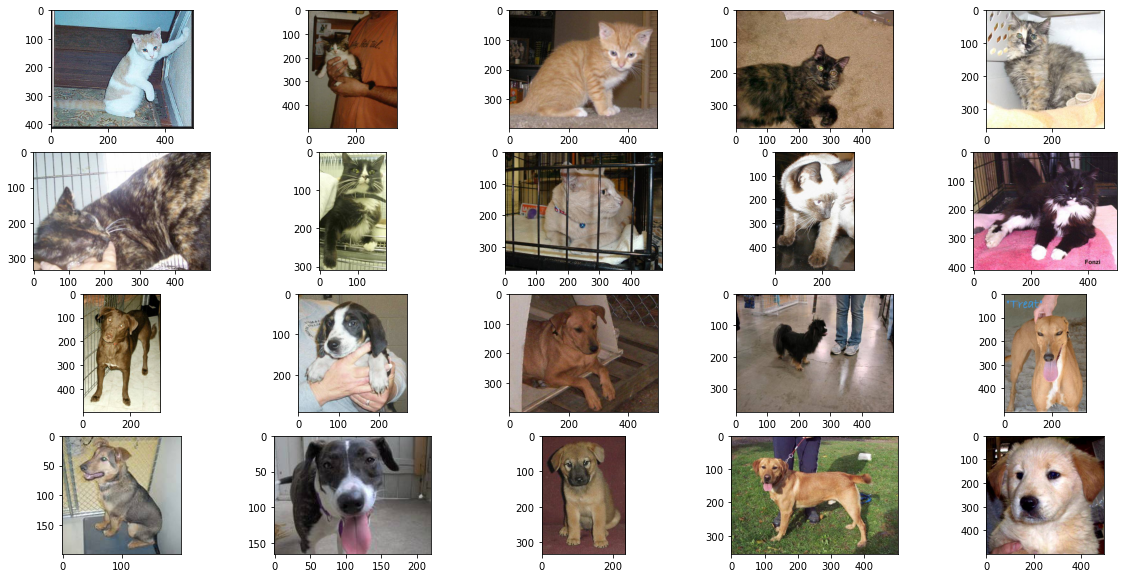

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 5

plt.figure(figsize=(20, 10))

for i, file_path in enumerate(trainpath_catslist+trainpath_dogslist):
    plt.subplot(nrows, ncols, i+1)
    img = mpimg.imread(file_path)
    plt.imshow(img)
    
plt.show()

In [15]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.25),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)       

In [16]:
imageDataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[.2, .2],
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

train_generator = imageDataGen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = 20
)

valDataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.
)

val_generator = valDataGen.flow_from_directory(
    val_dir,
    target_size = (128, 128),
    batch_size = 20
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [84]:
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch= 100,
    epochs= 100,
    verbose= 2,
    validation_data= val_generator,
    validation_steps= 50
)

Epoch 1/100
100/100 - 13s - loss: 0.5192 - accuracy: 0.7545 - val_loss: 0.9703 - val_accuracy: 0.6100
Epoch 2/100
100/100 - 12s - loss: 0.5318 - accuracy: 0.7180 - val_loss: 2.5147 - val_accuracy: 0.5420
Epoch 3/100
100/100 - 12s - loss: 0.5364 - accuracy: 0.7370 - val_loss: 1.2348 - val_accuracy: 0.6330
Epoch 4/100
100/100 - 11s - loss: 0.5360 - accuracy: 0.7250 - val_loss: 1.7021 - val_accuracy: 0.6110
Epoch 5/100
100/100 - 11s - loss: 0.5260 - accuracy: 0.7310 - val_loss: 1.2540 - val_accuracy: 0.6570
Epoch 6/100
100/100 - 12s - loss: 0.5490 - accuracy: 0.7285 - val_loss: 1.2793 - val_accuracy: 0.6520
Epoch 7/100
100/100 - 11s - loss: 0.5386 - accuracy: 0.7240 - val_loss: 1.2839 - val_accuracy: 0.6260
Epoch 8/100
100/100 - 12s - loss: 0.5300 - accuracy: 0.7330 - val_loss: 1.7043 - val_accuracy: 0.6550
Epoch 9/100
100/100 - 12s - loss: 0.5338 - accuracy: 0.7240 - val_loss: 3.7014 - val_accuracy: 0.5930
Epoch 10/100
100/100 - 12s - loss: 0.5257 - accuracy: 0.7315 - val_loss: 2.3064 - 

Epoch 81/100
100/100 - 11s - loss: 0.4516 - accuracy: 0.8015 - val_loss: 1.2857 - val_accuracy: 0.6790
Epoch 82/100
100/100 - 11s - loss: 0.4740 - accuracy: 0.7909 - val_loss: 1.2134 - val_accuracy: 0.6910
Epoch 83/100
100/100 - 11s - loss: 0.4735 - accuracy: 0.7775 - val_loss: 1.2303 - val_accuracy: 0.7050
Epoch 84/100
100/100 - 11s - loss: 0.4705 - accuracy: 0.7845 - val_loss: 1.6614 - val_accuracy: 0.6770
Epoch 85/100
100/100 - 11s - loss: 0.4812 - accuracy: 0.7675 - val_loss: 1.2773 - val_accuracy: 0.6930
Epoch 86/100
100/100 - 11s - loss: 0.4719 - accuracy: 0.7735 - val_loss: 1.4972 - val_accuracy: 0.6570
Epoch 87/100
100/100 - 11s - loss: 0.4788 - accuracy: 0.7690 - val_loss: 1.7461 - val_accuracy: 0.6230
Epoch 88/100
100/100 - 11s - loss: 0.4562 - accuracy: 0.7860 - val_loss: 1.5985 - val_accuracy: 0.6710
Epoch 89/100
100/100 - 11s - loss: 0.4672 - accuracy: 0.7680 - val_loss: 2.0196 - val_accuracy: 0.6480
Epoch 90/100
100/100 - 11s - loss: 0.4800 - accuracy: 0.7785 - val_loss: 

# Model 저장하기 + Model 불러오기

In [2]:
# model.save('./SaveModel/Dogs&Cats_10000.h5')

# # 불러오기 1.
# from keras.models import load_model
# model = load_model('./SaveModel/Dogs&Cats_10000.h5')
import tensorflow as tf
# # 불러오기 2.
model = tf.keras.models.load_model('./SaveModel/Dogs&Cats_10000.h5')

In [9]:
test_imagedatagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.
)

test_generator = test_imagedatagen.flow_from_directory(
    val_dir,
    target_size = (128, 128),
)

pred = model.predict_generator(
    generator = test_generator
)

Found 2023 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.


In [77]:
pred

array([[1.8492955e-03, 9.9808890e-01],
       [3.7227851e-06, 9.9999583e-01],
       [9.9355870e-01, 5.8705262e-03],
       ...,
       [1.8820003e-05, 9.9998045e-01],
       [8.3069829e-03, 9.9167949e-01],
       [1.3833096e-10, 1.0000000e+00]], dtype=float32)

In [62]:
np.argmax(pred, axis=1)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
dogs_list = os.listdir(val_dogs_dir)
cats_list = os.listdir(val_cats_dir)

In [55]:
dogs_list.pop()
cats_list.pop()

'_DS_Store'

In [65]:
total_list = []

total_list.extend(cats_list)
total_list.extend(dogs_list)

In [67]:
target = []

for filename in total_list:
    category = filename.split('.')
    if category[0] == 'dog':
        target.append(0)
    else:
        target.append(1)
        
dic = {'filenames':total_list, 'target':target}
df = pd.DataFrame(dic)
df

,filenames,target
0,cat.4001.jpg,1
1,cat.4002.jpg,1
2,cat.4003.jpg,1
3,cat.4004.jpg,1
4,cat.4005.jpg,1
...,...,...
2018,dog.4996.jpg,0
2019,dog.4997.jpg,0
2020,dog.4998.jpg,0
2021,dog.4999.jpg,0


In [78]:
target_arr = np.asarray(target)

In [79]:
pred_arr = np.argmax(pred, axis=1)

In [80]:
acc = np.mean(np.equal(target_arr, pred_arr))
print(f'정답률 : {acc*100}%')

정답률 : 50.469599604547696%


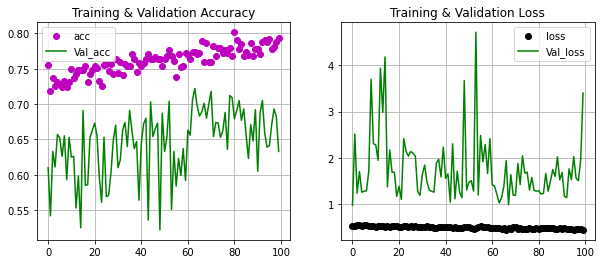

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_x = range(len(acc))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epoch_x, acc, 'mo', label='acc')
plt.plot(epoch_x, val_acc, 'g', label='Val_acc')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_x, loss, 'ko', label='loss')
plt.plot(epoch_x, val_loss, 'g', label='Val_loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()

plt.show()

# ImageDataGen 추가로 알게된 것을 사용해보자
### flow_from_directory에서 batch_size는 몇 개씩 가져올 것인지 설정하는 속성이다

In [12]:
imageDataGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.)

testGen = imageDataGen.flow_from_directory(
    val_dir,
    target_size = (128, 128),
    batch_size = 1
)

Found 2023 images belonging to 2 classes.


### ImageDataGen.next() : batch_size로 정한 값만큼 next method를 사용해서 data를 가져올 수 있다

In [13]:
img_info, img_label = testGen.next()

### Shape에서 (1, 128, 128, 3)의 의미 : '1'은 데이터 개수, (128, 128, 3)은 (가로, 세로, 색상[채널])을 의미함

In [21]:
img_info.shape, img_label.shape

((1, 128, 128, 3), (1, 2))

### next method는 (1, 128, 128, 3), (1, 2) 형태로 값을 반환함 / 변수 하나로도 반환을 받을 수도 있음
### array_to_img 입력값을 (128, 128, 3) 형태로 넣어줘야함
### model class 예측은 학습 시 input shape을 (x, x, x) 형태로 줬지만 다수의 데이터를 동시에 넣을 수도 있다. -> input shape(x, x, x, x)

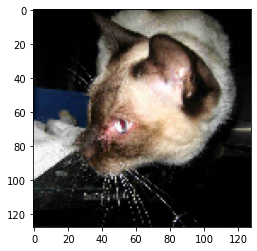

예측 : 개
정답 : 고양이


In [25]:
# imgs = testGen.next()
img_info, img_label = testGen.next()
img = tf.keras.preprocessing.image.array_to_img(img_info[0])

plt.imshow(img)
plt.show()

pred_class = model.predict_classes(img_info)

class_value = ['고양이', '개']

print(f'예측 : {class_value[pred_class[0]]}')
print(f'정답 : {class_value[np.argmax(img_label)]}')